### 머신러닝
- 분류 모델 생성

##### 생성의 무게와 크기로 생선 분류
- 데이터셋: fish.csv
- 피쳐/입력데이터: weight, lenght
- 타겟/클래스/출력: species
- 기계학습 방법: 지도학습==> 분류
- 분류 알고리즘(문제해결방법):미정

In [67]:
import pandas as pd 
import matplotlib.pyplot as plt

In [68]:
#경로 => 상대경로, 절대경로
#상대경로: 현재 파일을 기준으로 경로를 설정
# -./: 현재위치
#-../: 상위(한단계 위) 위치
DATA_FILE='../data/fish.csv'

# 절대경로: 드라이브 기준으로 경로를 설정 -> copypath
DATA_FILE2=r'C:\Users\KDP-25\Desktop\KDT_06\ML\Data\fish.csv'


In [69]:
#csv-> DataFrame으로 읽어오기
# 첫번째 줄: 컬럼명
# 구분자: 쉼표
# 로딩 컬럼: Species, Weight, Length(0,1,2)
# usecols-> 컬럼명 또는 컬럼인덱스
fish_DF= pd.read_csv(DATA_FILE, usecols=[0,1,2])
fish_DF2= pd.read_csv(r'C:\Users\KDP-25\Desktop\KDT_06\ML\Data\fish.csv', usecols=[0,1,2])

In [70]:
# 1-1 데이터 확인
fish_DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [71]:
# 1-2 컬럼별 결측치 체크
#  isnull()x (info에서 확인함)
# 컬럼별 고유값 체크 -->개수 ->uniqe, value_counts
fish_DF.value_counts()

Species    Weight  Length
Roach      160.0   22.5      2
Perch      120.0   22.0      2
Bream      600.0   32.0      2
           700.0   33.0      2
           242.0   25.4      1
                            ..
Perch      100.0   18.0      1
           110.0   21.0      1
                   22.0      1
           115.0   21.0      1
Whitefish  1000.0  40.0      1
Name: count, Length: 155, dtype: int64

In [72]:
# 1-3 컬럼별 중복값 체크
# 길이와 무게가 같다고 해서 다른 변수의 길이가 같지X
# 중복 데이터 유지(개인의 판단)

In [73]:
# 2. 피쳐와 타겟의 관계, 피쳐와 피쳐의 관계
# 2-1 피쳐와 타겟의 관계--> 연관성 확인(by 상관계수)
print(fish_DF.corr(numeric_only=True))   #-> 품종이 str이라 상관계수 확인 안됨

# --> object타입의 품종을 int로 변환
fish_DF['Species'].unique() #이름은 쓸수도 있으니 컬럼을 추가하자


fish_DF['spc_num']=fish_DF['Species'].replace({'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 
                                               'Pike': 6, 'Smelt':7})
print(fish_DF)

          Weight    Length
Weight  1.000000  0.918618
Length  0.918618  1.000000
    Species  Weight  Length  spc_num
0     Bream   242.0    25.4        1
1     Bream   290.0    26.3        1
2     Bream   340.0    26.5        1
3     Bream   363.0    29.0        1
4     Bream   430.0    29.0        1
..      ...     ...     ...      ...
154   Smelt    12.2    12.2        7
155   Smelt    13.4    12.4        7
156   Smelt    12.2    13.0        7
157   Smelt    19.7    14.3        7
158   Smelt    19.9    15.0        7

[159 rows x 4 columns]


In [74]:
# 일일이 적기 귀찮으면
# 1. zip()
key= list(fish_DF['Species'].unique())
values= range(1, len(key)+1)
data_dict= dict(zip(key, values)) ####zip 사용!!!!!!!!!!!!!!!!!!!!!!!

fish_DF2['spc_code']= fish_DF2['Species'].replace(data_dict)
print(fish_DF2)
# or 2. dictionary comprehension
names=fish_DF['Species'].unique().tolist()
print(names)
{name for name in  enumerate(names, start=1)} #-> 리스트를 키(인덱스)와 값으로 반환, 시작인덱스 지정 가능 



    Species  Weight  Length  spc_code
0     Bream   242.0    25.4         1
1     Bream   290.0    26.3         1
2     Bream   340.0    26.5         1
3     Bream   363.0    29.0         1
4     Bream   430.0    29.0         1
..      ...     ...     ...       ...
154   Smelt    12.2    12.2         7
155   Smelt    13.4    12.4         7
156   Smelt    12.2    13.0         7
157   Smelt    19.7    14.3         7
158   Smelt    19.9    15.0         7

[159 rows x 4 columns]
['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']


{(1, 'Bream'),
 (2, 'Roach'),
 (3, 'Whitefish'),
 (4, 'Parkki'),
 (5, 'Perch'),
 (6, 'Pike'),
 (7, 'Smelt')}

In [75]:
# 도미(Bream), 빙어(Smelt)에 대한 상관계수
mask=(fish_DF['Species']=='Bream') | (fish_DF['Species']=='Smelt')
twofishDF= fish_DF[mask]
twofishDF.corr(numeric_only=True)

,Weight,Length,spc_num
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
spc_num,-0.843828,-0.944132,1.000000


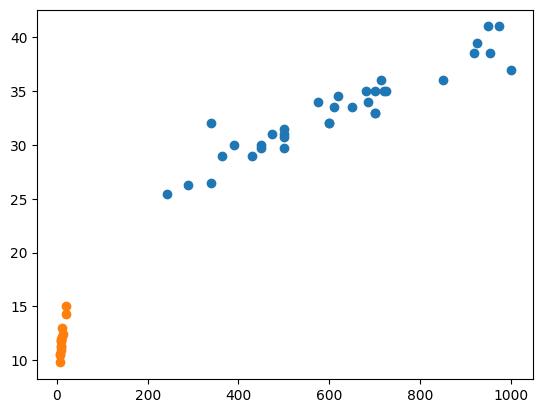

In [76]:
# 도마(Bream) 빙어(Smelt)에 대한 시각화-> 2개 피쳐를 종류에 따라 산점도 만들어서 분류 가능


plt.scatter(x= twofishDF.loc[:34, 'Weight'], y=twofishDF.loc[:34,'Length'])
plt.scatter(x= twofishDF.loc[145:,'Weight'], y=twofishDF.loc[145:,'Length'])
plt.show()

[3] 학습 훈련 진행
- 지도 학습==> 분류
- ML프레임워크==> scikit-learn
- 학습 알고리즘==> 최근점이웃알고리즘(KNN)

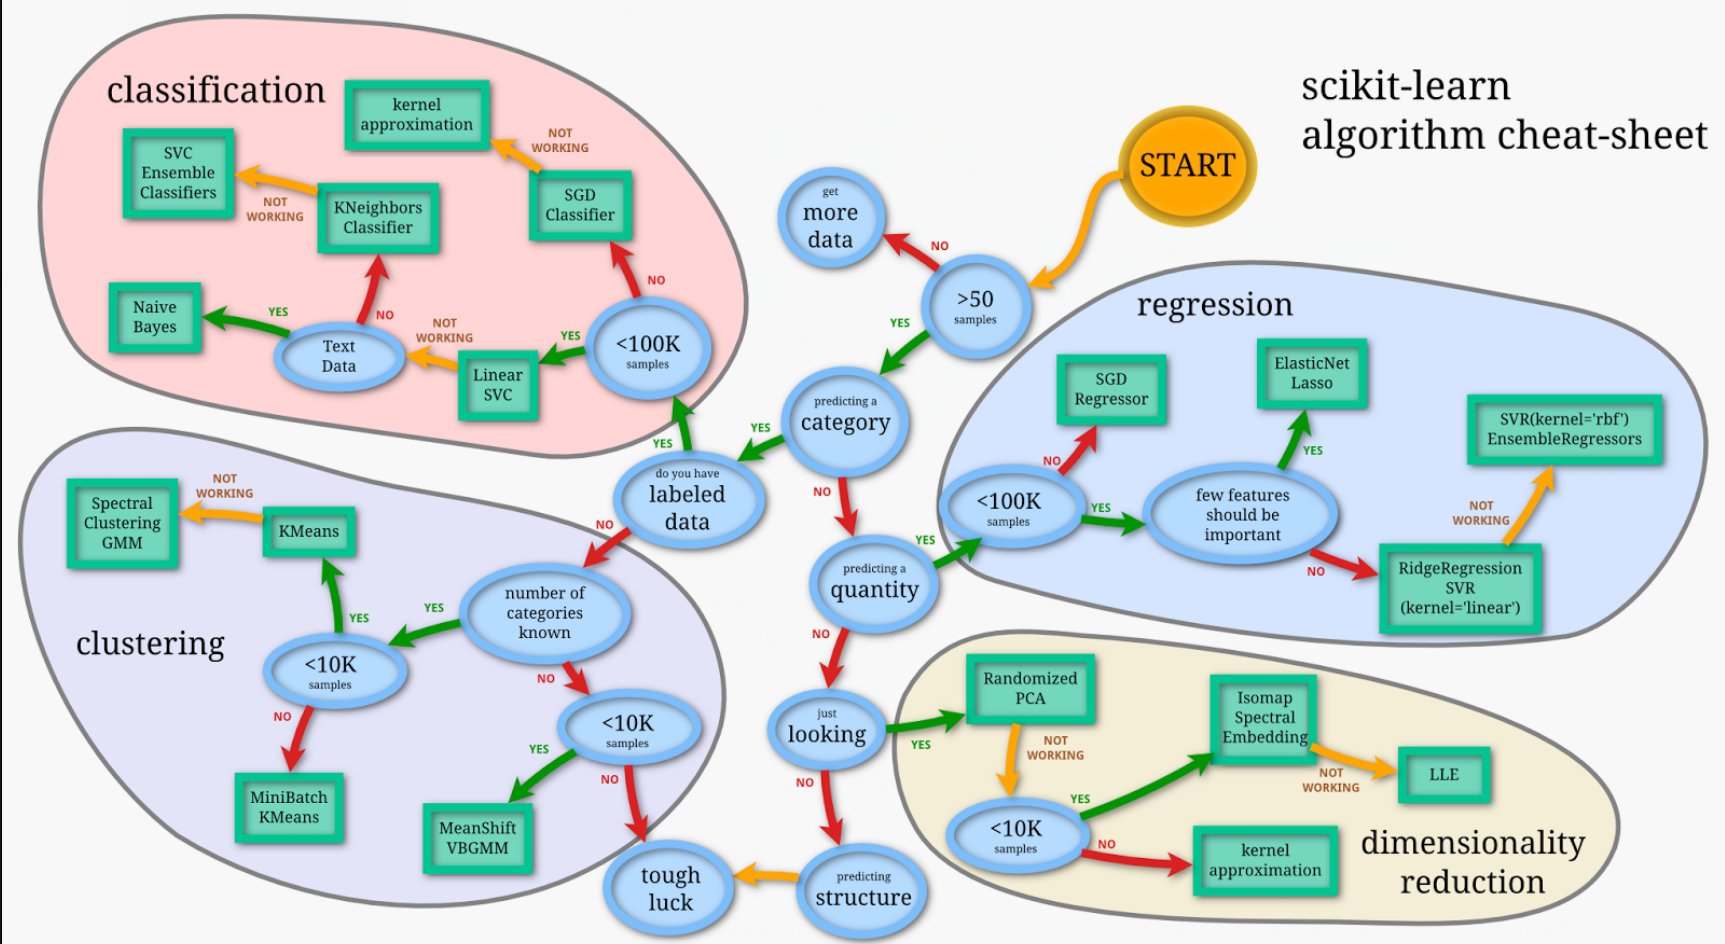

In [77]:
# ##모듈 로딩
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier() #->모델 인스턴스 생성
print(model, model.n_neighbors)


KNeighborsClassifier() 5


In [78]:
# print(model.classes) #-> error

In [79]:
# [2] 학습, 훈련 진행
# model.fit(피쳐-->무조건 2D, 타겟--> 무조건 1D)
features= twofishDF[['Weight', 'Length']]
target=twofishDF['spc_num']

print(features.shape, features.ndim)
print(target.shape, target.ndim)

(49, 2) 2
(49,) 1


In [80]:
model.fit(features, target)

KNeighborsClassifier()

In [81]:
print(model.classes_)         #->에러안남
#==> 학습 후 설정되는 속성= Model Parameter, 이름 뒤에 _(언더바) 있는 속성들

print(model.feature_names_in_)

[1 7]
['Weight' 'Length']


[4] 검증
- KNN은 모델(규칙 및 패턴) 생성x
- 검증 데이터가 입력이 되면 학습데이터와 거리 측정-> 지정된 K개수만큼 가까운 데이터를 도출
- 분류일 경우 K개수 데이터가 가진 라벨/타겟/클래스에 따라 다수결로 결정

In [82]:
twofishDF.head()

,Species,Weight,Length,spc_num
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1


In [83]:
# 검증 데이터와 타겟
data=fish_DF.loc[:4][['Weight', 'Length']]        #2차원으로 만들어야함, [[0]]or to_Frame or reshape(-1,1)
target=twofishDF.loc[:4]['spc_num']

In [84]:
# 새로운 데이터에 대해서 결과를 예측
# model.predict(2D)--> 1D반환
pre_target= model.predict(data)
print(pre_target)

[1 1 1 1 1]


In [85]:
# 예측 결과와 정답을 비교해서 점수를 도출
# model.score(2D피처, 1D타겟) =>0.0~1.0 반환
model.score(data, target)

1.0